# Image Classification with TensorFlow

PROJECT: To create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.


### Import TensorFlow

In [1]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 1.13.1


# The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plot an Image Example

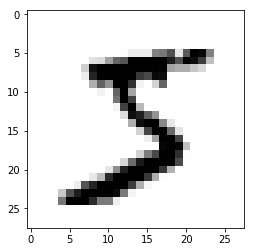

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

### Display Labels

In [12]:
y_train[0]

5

In [13]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [14]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [16]:
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [17]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [19]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test,(10000, 784))

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape:', x_test_reshaped.shape)
      

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


### Display Pixel Values

In [20]:
print(set(x_test_reshaped[0]))

{0, 129, 1, 3, 133, 5, 9, 140, 14, 17, 18, 19, 21, 22, 151, 159, 31, 163, 36, 35, 166, 38, 40, 170, 44, 52, 182, 185, 58, 59, 60, 187, 62, 57, 61, 66, 67, 198, 72, 75, 203, 205, 77, 207, 209, 83, 84, 219, 221, 222, 224, 225, 121, 227, 126, 229, 233, 106, 236, 238, 240, 241, 114, 115, 242, 248, 249, 250, 251, 253, 254, 255}


### Data Normalization

In [22]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [23]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Creating a Model
### Creating the Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


### Compiling the Model

In [26]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

### Training the Model

In [27]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 10s 174us/sample - loss: 0.3759 - acc: 0.8910
Epoch 2/3
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1815 - acc: 0.9471
Epoch 3/3
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1376 - acc: 0.9599


### Evaluating the Model

In [28]:
_, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:', accuracy* 100)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.1299 - acc: 0.9612
Test set accuracy: 96.11999988555908


# Predictions

### Predictions on Test Set

In [31]:
preds = model.predict(x_test_norm)
print('Shape of preds:', preds.shape)

Shape of preds: (10000, 10)


### Plotting the Results

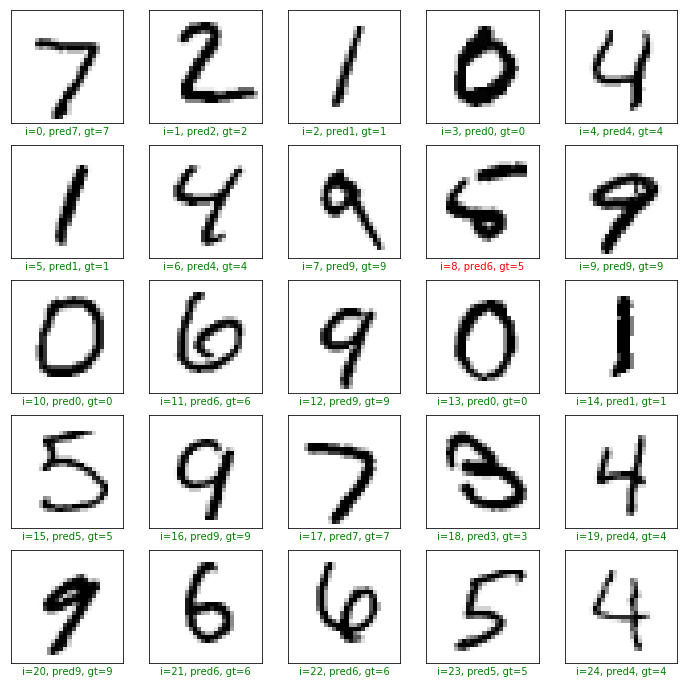

In [38]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col='r'
    
    plt.xlabel('i={}, pred{}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()

####  <font color="red">i=8 is misclassified</font>



Below we can see that the model classifies _i_=8 as 6 and any other integer very unlikely or imposssible. This makes sense as _i_= 8 is difficult to determine without a great deal of inference.

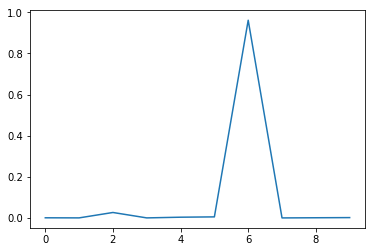

In [40]:
plt.plot(preds[8])
plt.show()